In [1]:
%matplotlib inline


# RandOm Convolutional KErnel Transform (ROCKET)

The RandOm Convolutional KErnel Transform (ROCKET) algorithm randomly
generates a great variety of convolutional kernels and extracts two
features for each convolution:
the maximum and the proportion of positive values.
This example illustrates basic usage of this algorithm and plots the
weights of the most relevant kernels according to mutual information.
It is implemented as :class:`pyts.transformation.ROCKET`.


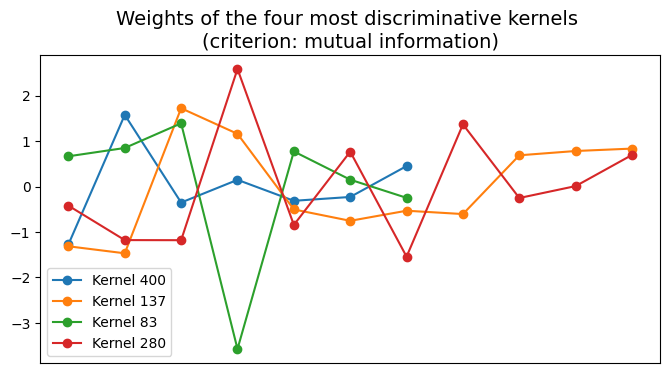

In [1]:
# Author: Johann Faouzi <johann.faouzi@gmail.com>
# License: BSD-3-Clause

import numpy as np
import matplotlib.pyplot as plt
from pyts.datasets import load_gunpoint
from pyts.transformation import ROCKET
from sklearn.feature_selection import mutual_info_classif

# Toy dataset
X, _, y, _ = load_gunpoint(return_X_y=True)

# ROCKET transformation
rocket = ROCKET(n_kernels=500, random_state=42)
X_rocket = rocket.fit_transform(X)

# Find the most discriminative kernels
n_kernels = 4
mutual_info = mutual_info_classif(X_rocket, y, random_state=42)
indices = np.floor_divide(np.argsort(mutual_info), 2)[-n_kernels:]

# Visualize the weights of the most discriminative kernels
plt.figure(figsize=(8, 4))
for idx in indices:
    plt.plot(rocket.weights_[idx, :rocket.length_[idx]], 'o-',
             label='Kernel {}'.format(idx))
plt.legend(loc='best')
plt.title('Weights of the four most discriminative kernels \n'
          '(criterion: mutual information)', fontsize=14)
plt.xticks([])
plt.show()

In [21]:
np.argsort(mutual_info)[-1]

560

In [23]:
mutual_info[-1]

0.3622656198943772

In [24]:
indices

array([400, 137,  83, 280], dtype=int64)

In [16]:
(X_rocket).shape

(50, 1000)

In [26]:
rocket.weights_[280]

array([-0.4212915 , -1.17811381, -1.18028712,  2.58369924, -0.84449175,
        0.76622907, -1.54261642,  1.3660202 , -0.25266572,  0.00933175,
        0.69418606])

In [25]:
rocket.length_[280]

11

In [27]:
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sktime.datasets import load_arrow_head  # univariate dataset
from sktime.datasets import load_basic_motions  # multivariate dataset
from sktime.datasets import (
    load_japanese_vowels,  # multivariate dataset with unequal length
)
from sktime.transformations.panel.rocket import (
    MiniRocket,
    MiniRocketMultivariate,
    MiniRocketMultivariateVariable,
)

In [28]:
X_train_jv, y_train_jv = load_japanese_vowels(split="train", return_X_y=True)
# lets visualize the first three voice recordings with dimension 0-11

print("number of samples training: ", X_train_jv.shape[0])
print("series length of recoding 0, dimension 5: ", X_train_jv.iloc[0, 5].shape)
print("series length of recoding 1, dimension 5: ", X_train_jv.iloc[1, 0].shape)

X_train_jv.head(3)

number of samples training:  270
series length of recoding 0, dimension 5:  (20,)
series length of recoding 1, dimension 5:  (26,)


,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11
0,0 1.860936 1 1.891651 2 1.939205 3...,0 -0.207383 1 -0.193249 2 -0.239664 3...,0 0.261557 1 0.235363 2 0.258561 3...,0 -0.214562 1 -0.249118 2 -0.291458 3...,0 -0.171253 1 -0.112890 2 -0.041053 3...,0 -0.118167 1 -0.112238 2 -0.102034 3...,0 -0.277557 1 -0.311997 2 -0.383300 3...,0 0.025668 1 -0.027122 2 0.019013 3...,0 0.126701 1 0.171457 2 0.169510 3...,0 -0.306756 1 -0.289431 2 -0.314894 3...,0 -0.213076 1 -0.247722 2 -0.227908 3...,0 0.088728 1 0.093011 2 0.074638 3...
1,0 1.303905 1 1.288280 2 1.332021 3...,0 0.067256 1 0.018672 2 -0.058744 3...,0 0.597720 1 0.631579 2 0.601928 3...,0 -0.271474 1 -0.355112 2 -0.347913 3...,0 -0.236808 1 -0.119216 2 -0.053463 3...,0 -0.411125 1 -0.434425 2 -0.421753 3...,0 -0.014826 1 -0.078036 2 -0.028479 3...,0 0.113175 1 0.178121 2 0.145073 3...,0 -0.058230 1 -0.106430 2 -0.159488 3...,0 -0.173138 1 -0.181910 2 -0.127751 3...,0 0.093058 1 0.093031 2 0.019092 3...,0 0.099247 1 0.099183 2 0.113546 3...
2,0 1.462484 1 1.309815 2 1.418207 3...,0 0.174066 1 0.120183 2 0.015721 3...,0 0.505133 1 0.503046 2 0.589994 3...,0 -0.374302 1 -0.327562 2 -0.310586 3...,0 -0.362125 1 -0.356789 2 -0.477019 3...,0 -0.400335 1 -0.445498 2 -0.367101 3...,0 -0.137429 1 -0.060423 2 -0.120849 3...,0 -0.000830 1 -0.007899 2 0.066952 3...,0 0.053888 1 0.041605 2 -0.023859 3...,0 -0.237630 1 -0.231087 2 -0.224317 3...,0 0.120636 1 0.121053 2 0.175298 3...,0 0.193254 1 0.202386 2 0.156670 3...


Speaker ID:  6


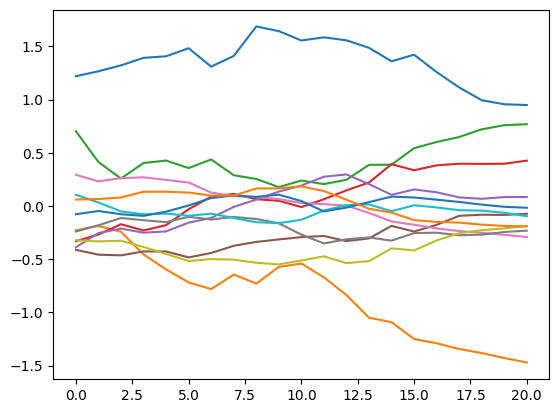

In [29]:
# additional visualizations
number_example = 153
for i in range(12):
    X_train_jv.loc[number_example, f"dim_{i}"].plot()
print("Speaker ID: ", y_train_jv[number_example])

In [30]:
minirocket_mv_var_pipeline = make_pipeline(
    MiniRocketMultivariateVariable(
        pad_value_short_series=-10.0, random_state=42, max_dilations_per_kernel=16
    ),
    StandardScaler(with_mean=False),
    RidgeClassifierCV(alphas=np.logspace(-3, 3, 10)),
)
print(minirocket_mv_var_pipeline)

minirocket_mv_var_pipeline.fit(X_train_jv, y_train_jv)

Pipeline(steps=[('minirocketmultivariatevariable',
                 MiniRocketMultivariateVariable(max_dilations_per_kernel=16,
                               pad_value_short_series=-10.0, random_state=42)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])))])


Pipeline(steps=[('minirocketmultivariatevariable',
                 MiniRocketMultivariateVariable(max_dilations_per_kernel=16,
                               pad_value_short_series=-10.0, random_state=42)),
                ('standardscaler', StandardScaler(with_mean=False)),
                ('ridgeclassifiercv',
                 RidgeClassifierCV(alphas=array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])))])

In [31]:
X_test_jv, y_test_jv = load_japanese_vowels(split="test", return_X_y=True)

minirocket_mv_var_pipeline.score(X_test_jv, y_test_jv)

0.9945945945945946

(20, 1)


In [43]:
from sktime.transformations.panel.rocket import Rocket
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score, accuracy_score
#rocket method
rocket = Rocket()

In [44]:
X, _, y, _ = load_gunpoint(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

In [52]:
rocket.fit(X_train) 
X_train_transform = rocket.transform(X_train) 
print(X_train_transform.shape)
X_test_transform = rocket.transform(X_test) 
print(X_test_transform.shape)


(1, 20000)
(1, 20000)


In [57]:
y_train.shape

(45,)

In [56]:
X_train_transform.shape

(1, 20000)

In [61]:
classes = ['1','2']

In [62]:
ridge=RidgeClassifierCV()
ridge.fit(X_train_transform, y_train) 
y_pred_ridge=ridge.predict(X_test_transform) 
acc_r = accuracy_score(y_test, y_pred_ridge) 
print("Rocket+ridge accuracy: %s"
%round(acc_r*100,2)+'%')
print("Rocket+ridge precision and recall:")


ValueError: Found input variables with inconsistent numbers of samples: [1, 20]

In [ ]:
for element in classes:
    precision=precision_score(y_test, y_pred_ridge,labels=[element], average=None)
    recall=recall_score(y_test, y_pred_ridge,labels=[element], average=None)
    print("Class %s:" %element+" precision: %d"%np.round(precision*100,2)+'%'+", recall: %d"%np.round(recall*100,2)+'%')
cm = confusion_matrix(y_test, y_pred_ridge) 
print("Confusion Matrix:")
print("Predicted Value")
print(" " + " ".join([str(c) for c in classes]))
print("Real Value")
for i, row in enumerate(cm):
    print("Class {}: {}".format(classes[i]," ".join([str(count) for count in row])))